# Rohan Sutradhar

# Task 3 - Sales Prediction

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

In [5]:
df = pd.read_csv("Advertising.csv")
df.drop("Unnamed: 0",axis=1,inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Understanding the data

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df[df.duplicated()].sum()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:xlabel='TV', ylabel='Sales'>

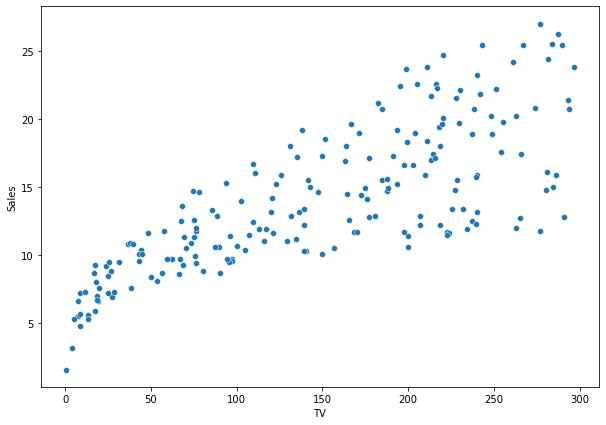

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'TV',y = 'Sales')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

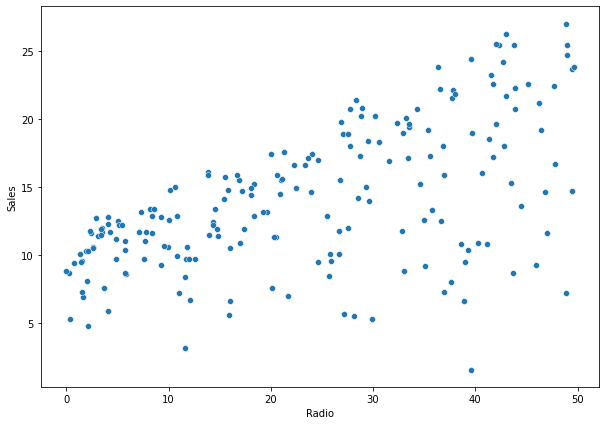

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'Radio',y = 'Sales')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

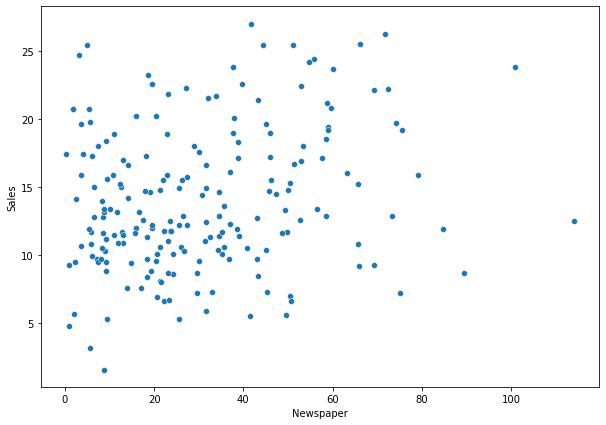

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'Newspaper',y = 'Sales')

<AxesSubplot:>

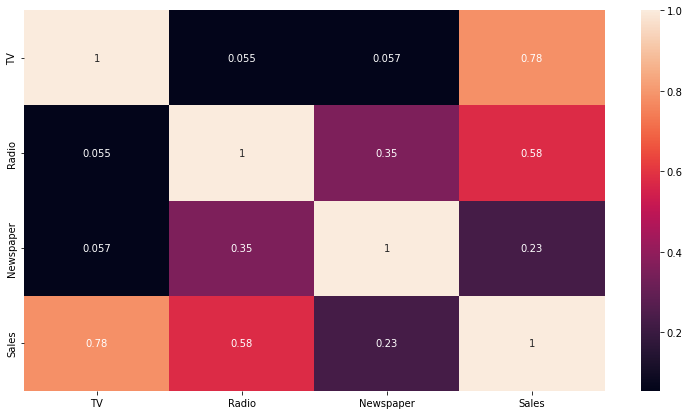

In [23]:
corr = df.corr(method = 'pearson')
plt.figure(figsize= (13,7))
sns.heatmap(corr, annot = True)

In [24]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 ,random_state = 1)

In [70]:
Sc = StandardScaler()
X_train_scale = Sc.fit_transform(X_train)
X_test_scale  = Sc.fit_transform(X_test)

# Linear Regression

In [71]:
model = LinearRegression()
model.fit(X_train_scale,y_train)
y_pred = model.predict(X_test_scale)

In [72]:
print("r2_score accuracy: ",r2_score(y_pred,y_test)*100,"%")

r2_score accuracy:  90.40952406001685 %


In [73]:
pred = pd.DataFrame({
    'Actual': y_test,
    'Predict': y_pred.flatten()
})
pred.head()

,Actual,Predict
58,23.8,21.529717
40,16.6,15.812954
34,9.5,6.451745
102,14.8,17.256329
184,17.6,18.143928


# Visualizing the model

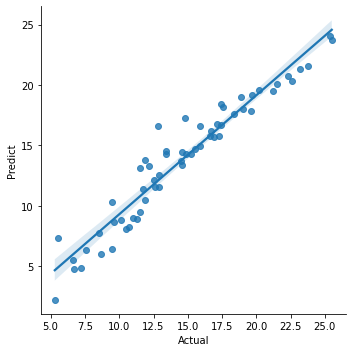

In [74]:
sns.lmplot(data = pred, x = 'Actual', y ='Predict')